In [75]:
import os
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

path_train = os.path.join('./', 'dataset_birds/train/')

# on recupère toute les classes dans une liste
classes = []
for item in os.listdir(path_train):
    classes.append(item)

In [48]:
# on créé une liste contenant le nombre d'images par classe

images_count = []
for folder in classes:
    items = os.listdir(path_train+folder)
    images_count.append(len(items))

In [49]:
# on créé un DataFrame contenant ces deux listes

dict = {'classe': classes, 'img_nbr': images_count}

df = pd.DataFrame(dict)
df = df.set_index("classe")
df.head()

,img_nbr
classe,
ABBOTTS BABBLER,163
ABBOTTS BOOBY,180
ABYSSINIAN GROUND HORNBILL,179
AFRICAN CROWNED CRANE,135
AFRICAN EMERALD CUCKOO,154


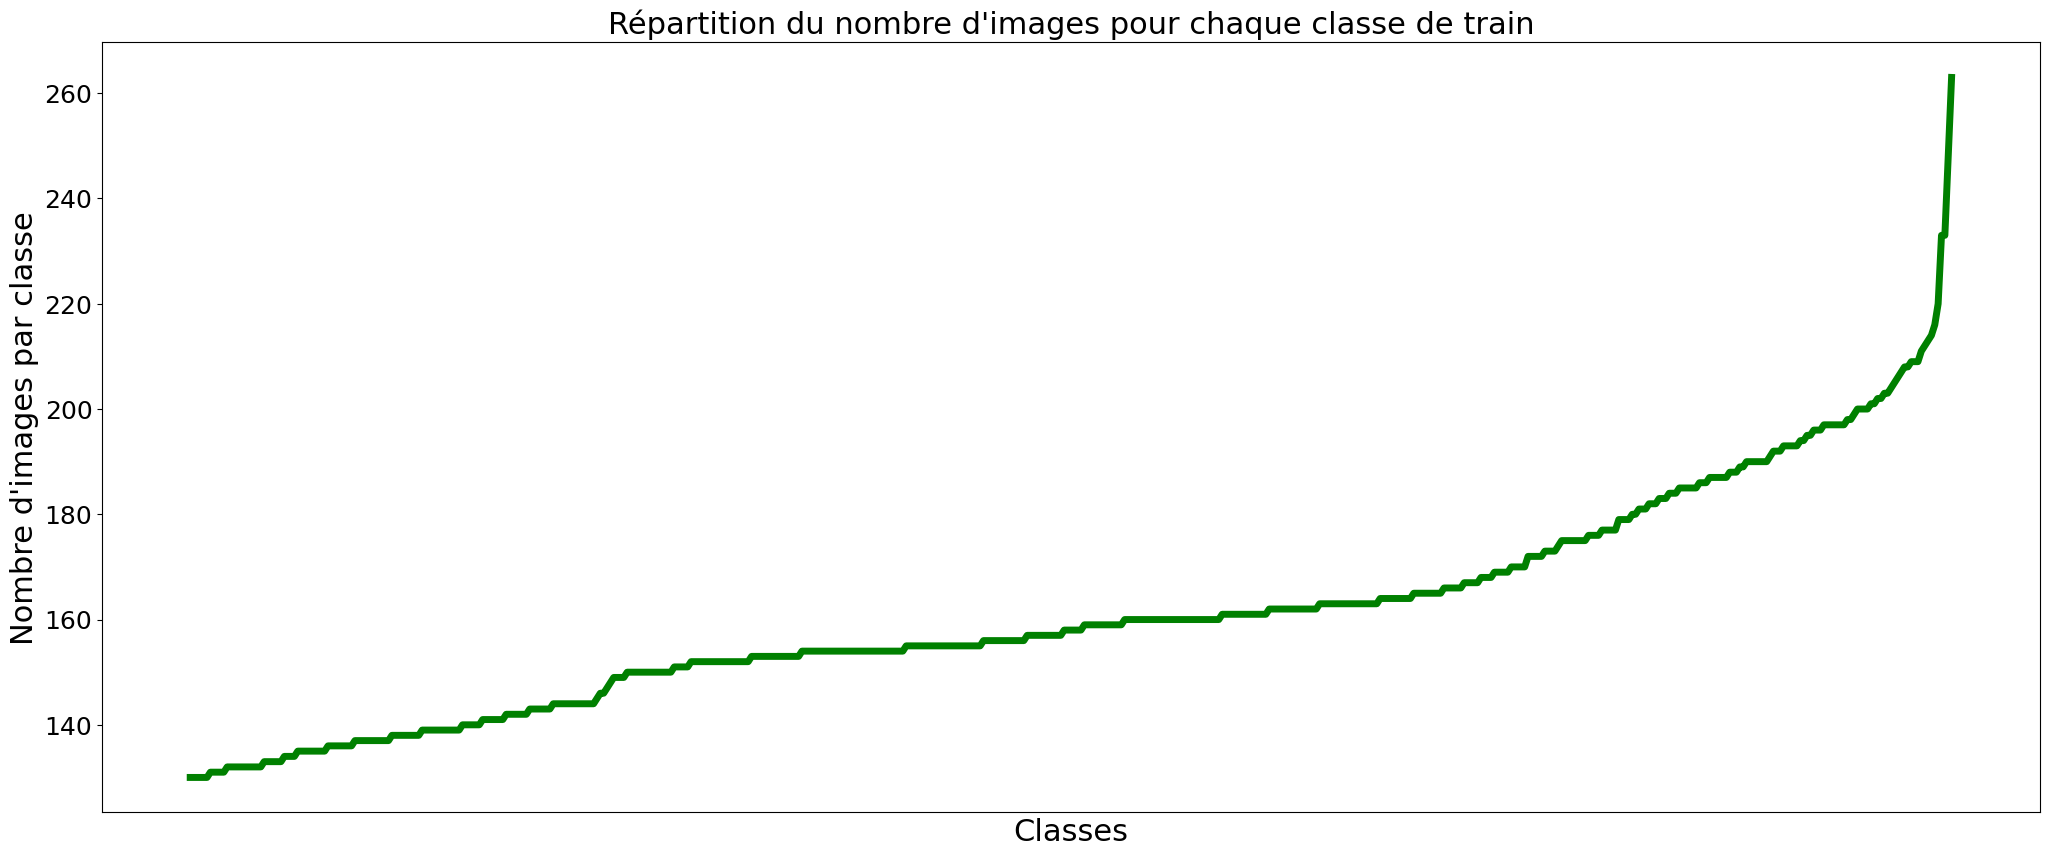

In [70]:
# on affiche une courbe représentant le nombre d'images par classes

plt.figure(figsize = (25,10))
df = df.sort_values(by = 'img_nbr')
plt.plot(df.index, df.img_nbr, linewidth = 5, color = 'green')
plt.title("Répartition du nombre d'images pour chaque classe de train", fontsize = 22)
plt.xlabel("Classes", fontsize = 22)
plt.ylabel("Nombre d'images par classe", fontsize = 22)
plt.xticks([])
plt.yticks(fontsize = 18);

In [98]:
html_content = """

<p><b> Ce graphique montre que la répartition du nombre d'images entre les classes est très hétérogène, avec quelques valeurs très élevées. </b></p>

"""
display(HTML(html_content))

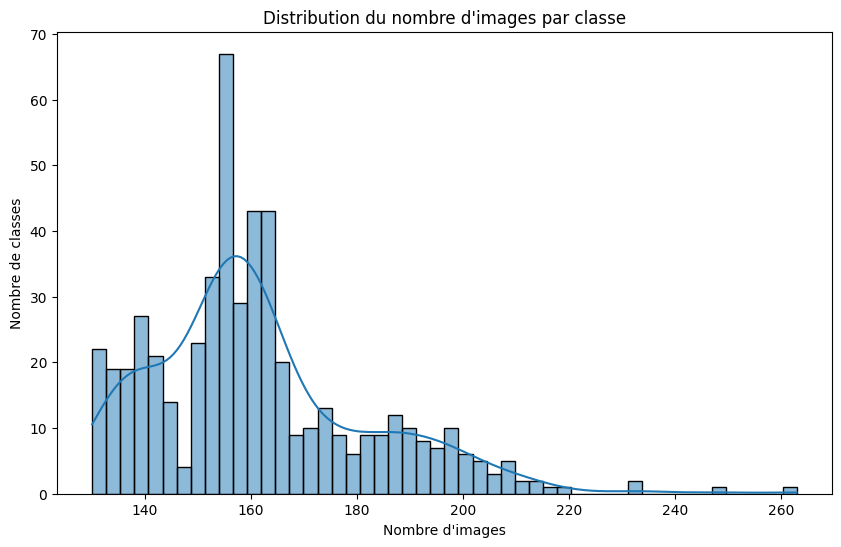

In [51]:
# création d'un graphique de distribution avec courbe Kde

plt.figure(figsize=(10, 6))
sns.histplot(df['img_nbr'], bins=50, kde=True)
plt.title('Distribution du nombre d\'images par classe')
plt.xlabel('Nombre d\'images')
plt.ylabel('Nombre de classes')
plt.show()

In [99]:
html_content = """

<p><b> Ce graphique indique qu'environ la moitié des classes ont un nombre d'images compris entre 150 et 180,
tandis que le reste est inférieur ou supérieur à cette plage, avec quelques rares valeurs au dessus de 220. </b></p>

"""
display(HTML(html_content))

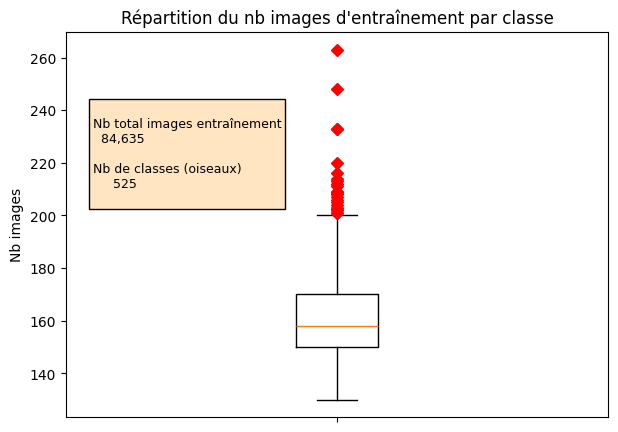

In [52]:
# Analyse de distribution avec une boîte à moustaches
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(111)
ax1.boxplot(df, 0, 'rD')
ax1.set_xticks([1], [])
ax1.set_ylabel('Nb images')
titre = ax1.set_title("Répartition du nb images d'entraînement par classe")

# Ajout d'un texte avec des informations complémentaires dans le graphique
txt = f"""
Nb total images entraînement
{df['img_nbr'].sum():>8,.0f}

Nb de classes (oiseaux)
{df.shape[0]:>8,.0f}
"""
t = ax1.text(0.55, 205, txt, fontsize="9", bbox={'boxstyle':'square',
                   'facecolor': '#ffe5c1',
                   'edgecolor':'black'})

In [102]:
html_content = """

<p><b> Ce graphique permet de mettre en avant encore plus les valeurs abberantes, qui représentent des classes où des suppressions
seront nécessaires. On voit aussi que la médiane est à environ 155 images par classe. </b></p>

"""
display(HTML(html_content))

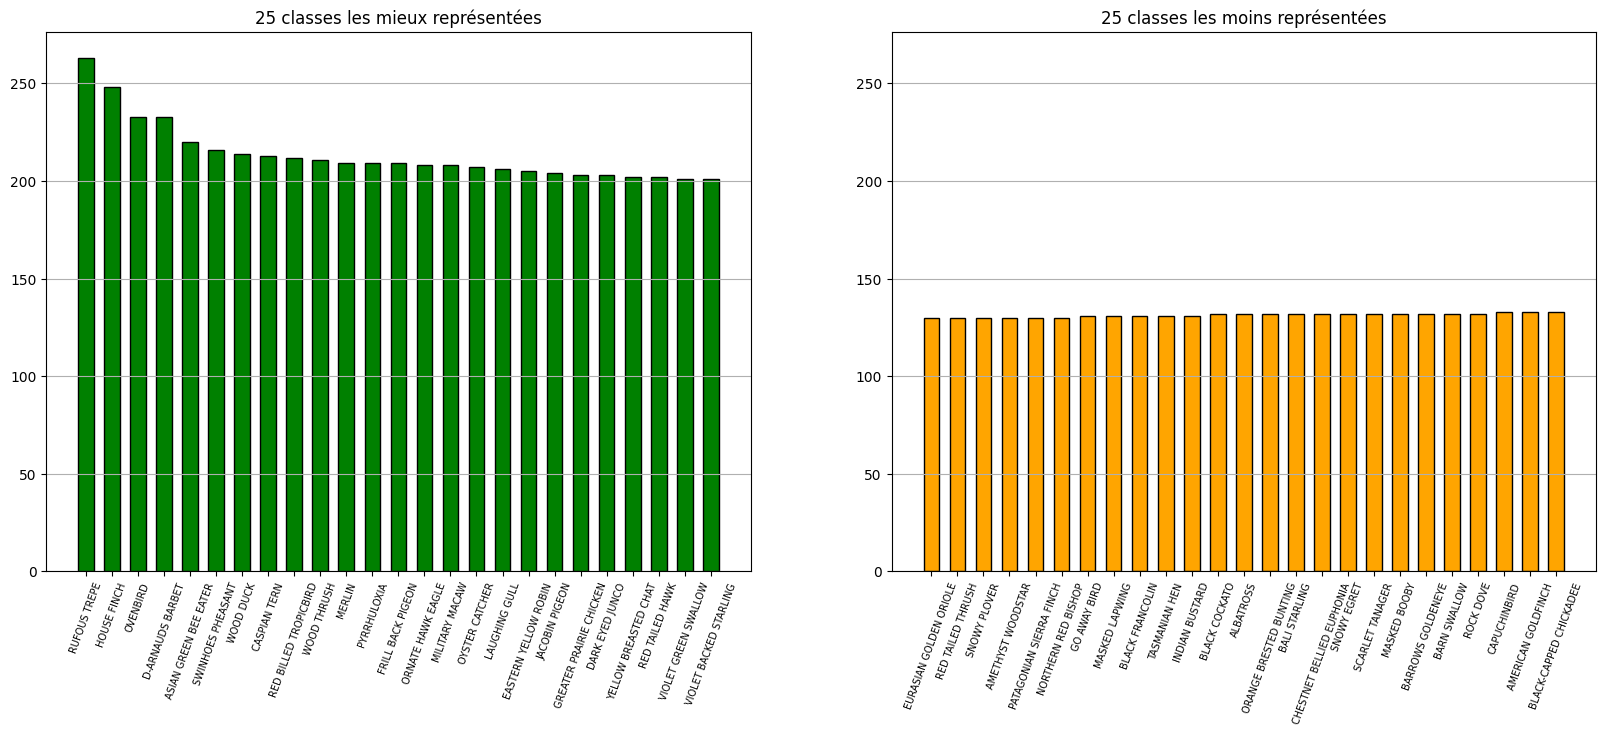

In [89]:
### Affichage des 25 classes les mieux et moins bien représentées
fig = plt.figure(figsize=(20, 7))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey=ax1)

# 25 Classes les mieux representées
best = df.sort_values(by='img_nbr', ascending=False).head(25)
ax1.bar(best.index, best['img_nbr'], color='green', width=0.6, edgecolor='black')
ax1.grid(True, axis='y')
ax1.set_title('25 classes les mieux représentées')
ax1.tick_params(axis='x', labelrotation=70)
for t in ax1.get_xticklabels():
   t.set_fontsize(7.)

# 25 Classes les moins bien representées
worse = df.sort_values(by='img_nbr').head(25)
ax2.bar(worse.index, worse['img_nbr'], color='orange', width=0.6, edgecolor='black')
ax2.grid(True, axis='y')
ax2.set_title('25 classes les moins représentées')
ax2.tick_params(axis='x', labelrotation=70)
for t in ax2.get_xticklabels():
   t.set_fontsize(7.)

In [101]:
html_content = """

<p><b> Ces graphiques montrent qu'il y a quand même un certain nombre de classes aux valeurs très opposées en terme de nombre d'images.</b></p>

"""
display(HTML(html_content))

In [88]:
html_content = """

<h2> Remarques sur les graphiques </h2>
<p> On remarque avec tous ces graphiques que le nombre d'images par classe est très variable, entre 130 et 260. 
Il sera nécessaire d'équilibrer le dataset, proablement en faisant un mix de suppression pour les rares classes ayant plus de 220 images, 
et une augmentation des données des autres classes.</p>
<p> Il est possible de dupliquer les images, pour donner un poids équivalent à toutes les classes; il est aussi envisageable d'appliquer des
transformations de luminosité, contraste et saturation pour augmenter artificiellement des classes faibles. </p>
<p> Le camembert nous permet ici de voir que le jeu de test et de validation contient très peu d'images en comparaison du jeu train,
et il serait préférable de refaire par nous-même la répartition avec un pourcentage d'images test/valid entre 20% et 30% du total des images. </p>
"""

display(HTML(html_content))